# figure 4

## simulation analysis

compute eigenvalues of covariance produced by sparse, clustered and locally structured connectivity matrices

will take < 1 hour on a GPU

In [5]:
import numpy as np 
import torch
import sys, os
sys.path.insert(0, "../")
import analysis
from pathlib import Path 
from natsort import natsorted
from sparse_clustered_local_sims import sparse_evals, clustered_evals, local_evals

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [6]:
os.makedirs("../results", exist_ok=True)

torch.manual_seed(0)
if device.type == "cuda":
    torch.cuda.manual_seed(0)

# compute eigenvalues of covariance for sparse connectivity matrices
print("computing eigenvalues of covariance for sparse connectivity matrices")
evals_sparsities_all, sparsities = sparse_evals(n_sim=10, nn=10000, device=device)
np.save("../results/sim_sparse.npy", {"evals": evals_sparsities_all,
        "sparsities": sparsities})

# compute eigenvalue of covariance for clustered connectivity matrices
print("computing eigenvalues of covariance for clustered connectivity matrices")
evals_clustered_all, Aex, pglobals = clustered_evals(n_sim=10, nn=10000, device=device)
np.save("../results/sim_cluster.npy", {"evals": evals_clustered_all, "Aex": Aex,
                        "pglobals": pglobals})

# compute eigenvalues of covariance for local connectivity matrices
print("computing eigenvalues of covariance for connectivity matrices w/ local structure")
out = local_evals(n_sim=10, nn=10000, device=device)
(evals_local_all, perc, perc_local_all, var_all, pglobals, pcs_local_all, ypos_local_all, xpos_local_all, 
    Aex, cov_ex, ypos_ex, xpos_ex, dbin_strong_all, dbin_other_all, cov_bin_all, drand_all, crand_all, pconn, bin_size, pstrong, dist_min) = out
np.save("../results/sim_local.npy", {"evals_local_all": evals_local_all, "perc": perc, 
                        "perc_local_all": perc_local_all, "var_all": var_all,
                        "pglobals": pglobals, "pcs_local_all": pcs_local_all,
                        "ypos_local_all": ypos_local_all, "xpos_local_all": xpos_local_all,
                        "Aex": Aex, "cov_ex": cov_ex, "ypos_ex": ypos_ex, "xpos_ex": xpos_ex,
                        "dbin_strong_all": dbin_strong_all, "dbin_other_all": dbin_other_all,
                        "cov_bin_all": cov_bin_all, "drand_all": drand_all, 
                        "crand_all": crand_all, "pconn": pconn,
                        "bin_size": bin_size, "pstrong": pstrong, "dist_min": dist_min })



computing eigenvalues of covariance for sparse connectivity matrices


 90%|█████████ | 9/10 [02:21<00:15, 15.71s/it]

p(conn) (%) = 0.024, alpha = 0.46
p(conn) (%) = 0.049, alpha = 0.50
p(conn) (%) = 0.098, alpha = 0.63
p(conn) (%) = 0.195, alpha = 0.66
p(conn) (%) = 0.391, alpha = 0.69
p(conn) (%) = 0.781, alpha = 0.69
p(conn) (%) = 1.562, alpha = 0.69
p(conn) (%) = 3.125, alpha = 0.69
p(conn) (%) = 6.250, alpha = 0.69
p(conn) (%) = 12.500, alpha = 0.68


100%|██████████| 10/10 [02:37<00:00, 15.76s/it]


p(conn) (%) = 25.000, alpha = 0.69
computing eigenvalues of covariance for clustered connectivity matrices


 90%|█████████ | 9/10 [02:34<00:17, 17.18s/it]

p(local) / p(global) = 2048, alpha = 0.61
p(local) / p(global) = 1024, alpha = 0.63
p(local) / p(global) = 512, alpha = 0.64
p(local) / p(global) = 256, alpha = 0.65
p(local) / p(global) = 128, alpha = 0.66
p(local) / p(global) = 64, alpha = 0.69
p(local) / p(global) = 32, alpha = 0.70
p(local) / p(global) = 16, alpha = 0.68
p(local) / p(global) = 8, alpha = 0.69
p(local) / p(global) = 4, alpha = 0.69
p(local) / p(global) = 2, alpha = 0.69


100%|██████████| 10/10 [02:52<00:00, 17.21s/it]

p(local) / p(global) = 1, alpha = 0.69


computing eigenvalues of covariance for connectivity matrices w/ local structure


 10%|█         | 1/10 [02:38<23:42, 158.04s/it]/media/carsen/ssd1/github/critical_init/fig4/analysis.py:92: RuntimeWarning: Mean of empty slice
  cov_bin[:, d] = np.array([np.nanmean(cov_filter[i, d0[i]], axis=-1)
 90%|█████████ | 9/10 [23:29<02:36, 156.30s/it]

p(local) / p(global) = 2048, alpha = 0.54
p(local) / p(global) = 1024, alpha = 0.60
p(local) / p(global) = 512, alpha = 0.61
p(local) / p(global) = 256, alpha = 0.67
p(local) / p(global) = 128, alpha = 0.67
p(local) / p(global) = 64, alpha = 0.68
p(local) / p(global) = 32, alpha = 0.69
p(local) / p(global) = 16, alpha = 0.69
p(local) / p(global) = 8, alpha = 0.69
p(local) / p(global) = 4, alpha = 0.68
p(local) / p(global) = 2, alpha = 0.68


100%|██████████| 10/10 [26:06<00:00, 156.60s/it]

p(local) / p(global) = 1, alpha = 0.69


## data analysis

analysis of strong pairs from facemap paper recordings

available at https://janelia.figshare.com/articles/dataset/Facemap_a_framework_for_modeling_neural_activity_based_on_orofacial_tracking/23712957

download and unzip neural data to a folder, will take 1-2 hours to run (cpu-based)

In [3]:
import importlib 
importlib.reload(analysis)

files = [f for f in Path("/media/carsen/ssd3/facemap/neural_data_udcnv/").glob("*.npz")]
files = natsorted(files)

out = analysis.neural_strong_pairs(files)
(pcs_all, ypos_all, xpos_all, var_all, 
            dbin_strong_all, dbin_other_all, cov_bin_all, drand_all, crand_all,
            bin_size, pstrong, dist_min) = out

np.save("../results/strongpairs_data_all.npy", 
           {"pcs_all": pcs_all, "ypos_all": ypos_all, "xpos_all": xpos_all,
            "var_all": var_all,
            "dbin_strong_all": dbin_strong_all, "dbin_other_all": dbin_other_all,
            "cov_bin_all": cov_bin_all, "drand_all": drand_all, "crand_all": crand_all,
            "bin_size": bin_size, "pstrong": pstrong, "dist_min": dist_min})

0it [00:00, ?it/s]

>>> spont_D3_2021_11_22_2_spks, n_neurons = 34946, nt = 28683 (159.3 minutes)


1it [02:32, 152.32s/it]

>>> spont_D4_2021_11_23_2_spks, n_neurons = 32584, nt = 23516 (130.6 minutes)


/media/carsen/ssd1/github/critical_init/fig4/analysis.py:92: RuntimeWarning: Mean of empty slice
  cov_bin[:, d] = np.array([np.nanmean(cov_filter[i, d0[i]], axis=-1)
2it [04:38, 136.69s/it]

>>> spont_D7_2021_11_18_2_spks, n_neurons = 38442, nt = 21212 (117.8 minutes)


3it [07:37, 156.39s/it]

>>> spont_D8_2021_11_18_3_spks, n_neurons = 28258, nt = 21217 (117.9 minutes)


/media/carsen/ssd1/github/critical_init/fig4/analysis.py:92: RuntimeWarning: Mean of empty slice
  cov_bin[:, d] = np.array([np.nanmean(cov_filter[i, d0[i]], axis=-1)
4it [09:24, 136.54s/it]

>>> spont_D8_2021_11_29_1_spks, n_neurons = 34086, nt = 27682 (153.8 minutes)


5it [11:48, 139.36s/it]

>>> spont_D9_2021_11_22_2_spks, n_neurons = 24708, nt = 23588 (131.0 minutes)


/media/carsen/ssd1/github/critical_init/fig4/analysis.py:92: RuntimeWarning: Mean of empty slice
  cov_bin[:, d] = np.array([np.nanmean(cov_filter[i, d0[i]], axis=-1)
6it [13:07, 118.94s/it]

>>> spont_TX56_2020_10_22_1_spks, n_neurons = 43787, nt = 29618 (164.5 minutes)


/media/carsen/ssd1/github/critical_init/fig4/analysis.py:92: RuntimeWarning: Mean of empty slice
  cov_bin[:, d] = np.array([np.nanmean(cov_filter[i, d0[i]], axis=-1)
7it [17:06, 158.10s/it]

>>> spont_TX57_2020_10_21_1_spks, n_neurons = 37937, nt = 23492 (130.5 minutes)


/media/carsen/ssd1/github/critical_init/fig4/analysis.py:92: RuntimeWarning: Mean of empty slice
  cov_bin[:, d] = np.array([np.nanmean(cov_filter[i, d0[i]], axis=-1)
8it [19:59, 162.91s/it]

>>> spont_TX60_2020_10_20_2_spks, n_neurons = 49626, nt = 23185 (128.8 minutes)


/media/carsen/ssd1/github/critical_init/fig4/analysis.py:92: RuntimeWarning: Mean of empty slice
  cov_bin[:, d] = np.array([np.nanmean(cov_filter[i, d0[i]], axis=-1)
9it [24:58, 205.28s/it]

>>> spont_TX60_2020_10_22_1_spks, n_neurons = 49748, nt = 23226 (129.0 minutes)


/media/carsen/ssd1/github/critical_init/fig4/analysis.py:92: RuntimeWarning: Mean of empty slice
  cov_bin[:, d] = np.array([np.nanmean(cov_filter[i, d0[i]], axis=-1)
10it [29:33, 227.06s/it]

>>> spont_TX61_2020_10_21_1_spks, n_neurons = 50060, nt = 24793 (137.7 minutes)


/media/carsen/ssd1/github/critical_init/fig4/analysis.py:92: RuntimeWarning: Mean of empty slice
  cov_bin[:, d] = np.array([np.nanmean(cov_filter[i, d0[i]], axis=-1)
11it [34:15, 243.73s/it]

>>> spont_TX61_2020_11_02_2_spks, n_neurons = 50439, nt = 23252 (129.2 minutes)


/media/carsen/ssd1/github/critical_init/fig4/analysis.py:92: RuntimeWarning: Mean of empty slice
  cov_bin[:, d] = np.array([np.nanmean(cov_filter[i, d0[i]], axis=-1)
12it [39:00, 256.39s/it]

>>> spont_TX103_2022_10_05_2_spks, n_neurons = 84310, nt = 25583 (142.1 minutes)


/media/carsen/ssd1/github/critical_init/fig4/analysis.py:92: RuntimeWarning: Mean of empty slice
  cov_bin[:, d] = np.array([np.nanmean(cov_filter[i, d0[i]], axis=-1)
13it [1:02:46, 610.71s/it]

>>> spont_TX104_2022_10_05_2_spks, n_neurons = 60649, nt = 25193 (140.0 minutes)


/media/carsen/ssd1/github/critical_init/fig4/analysis.py:92: RuntimeWarning: Mean of empty slice
  cov_bin[:, d] = np.array([np.nanmean(cov_filter[i, d0[i]], axis=-1)
14it [1:12:19, 599.20s/it]

>>> spont_VR2_2020_10_22_1_spks, n_neurons = 59296, nt = 24622 (136.8 minutes)


/media/carsen/ssd1/github/critical_init/fig4/analysis.py:92: RuntimeWarning: Mean of empty slice
  cov_bin[:, d] = np.array([np.nanmean(cov_filter[i, d0[i]], axis=-1)
15it [1:20:19, 563.41s/it]

>>> spont_VR2_2020_10_26_1_spks, n_neurons = 58657, nt = 24002 (133.3 minutes)


/media/carsen/ssd1/github/critical_init/fig4/analysis.py:92: RuntimeWarning: Mean of empty slice
  cov_bin[:, d] = np.array([np.nanmean(cov_filter[i, d0[i]], axis=-1)
16it [1:27:24, 327.80s/it]


### make figure

(10, 12)


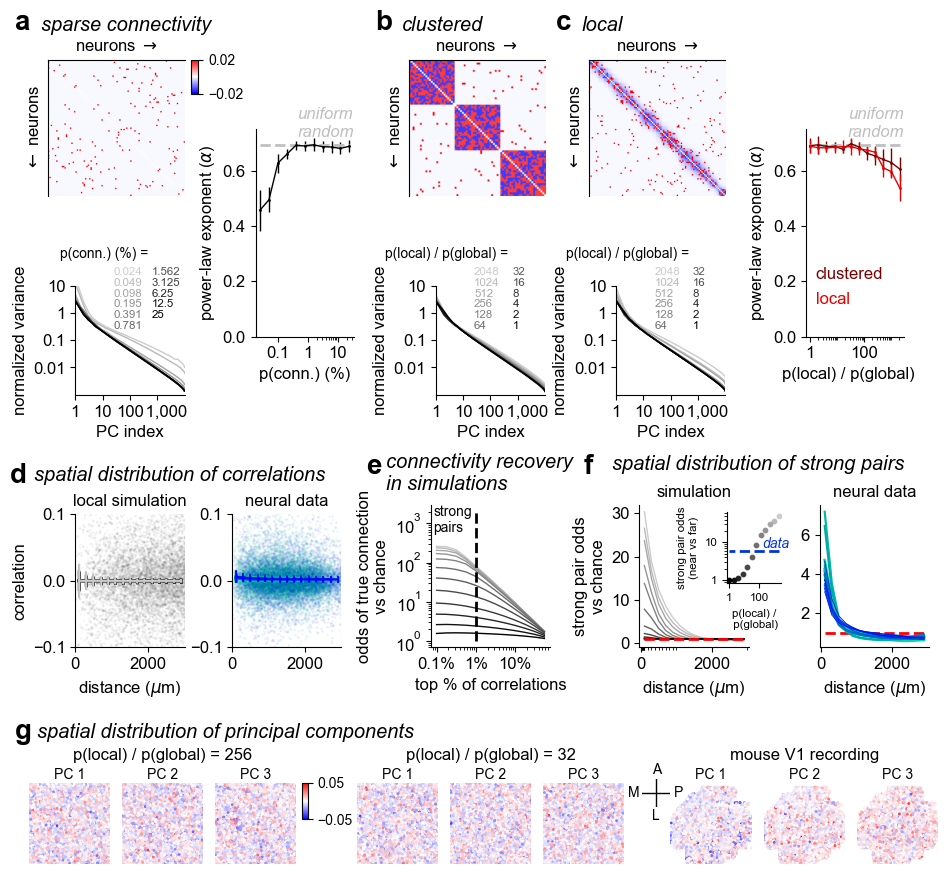

In [7]:
import fig4
import importlib
importlib.reload(fig4)

dat_sparse = np.load("../results/sim_sparse.npy", allow_pickle=True).item()
dat_clustered = np.load("../results/sim_cluster.npy", allow_pickle=True).item()
dat_local = np.load("../results/sim_local.npy", allow_pickle=True).item()
dat_neural = np.load("../results/strongpairs_data_all.npy", allow_pickle=True).item()

fig = fig4.fig4(dat_sparse, dat_clustered, dat_local, dat_neural)
os.makedirs("../figures/", exist_ok=True)
fig.savefig("../figures/fig4.pdf")
